# 使用opencv读取图片并画出bbox

In [18]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [19]:
# 读取数据，将第一行作为列名
submit_data = pd.read_csv('../starting_kit/test.csv', header = 0)

In [20]:
# 定义图片的序号，bbox的数量，是否只显示排名第bbox_num的bbox
img_idx = 9
bbox_num = 4
is_show_one = False

# 定义colors集合，用于画bbox时的颜色
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 0),
    (0, 255, 255),
    (255, 0, 255),
    (255, 255, 0),
]


In [21]:
# 读取图片
show_img_id = submit_data['image_id'][img_idx]

# 找到show_img_id对应的图片
# img = Image.open('./data/dl_detection/test/' + '%07d.jpg'%show_img_id)
img = cv2.imread('../data/dl_detection/test/' + '%07d.jpg'%show_img_id)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bbox_list = bboxStrToList(submit_data['predictions'][img_idx])

In [22]:
# 获得前bbox_num个bbox的信息
show_img_bboxs = []
show_img_labels = []
show_img_confs = []
if is_show_one:
    bbox = bbox_list[bbox_num - 1]
    show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
    show_img_confs.append(bbox[4])
    show_img_labels.append(bbox[5])
else:
    for i in range(bbox_num):
        bbox = bbox_list[i]
        show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
        show_img_confs.append(bbox[4])
        show_img_labels.append(bbox[5])

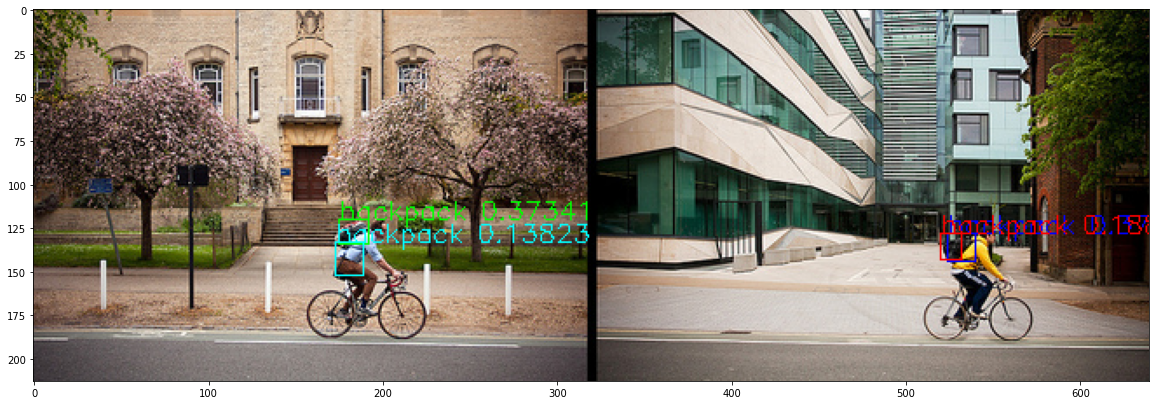

In [23]:
# 在原图上画出bbox
for idx in range(len(show_img_bboxs)):
    bbox = show_img_bboxs[idx]
    label = show_img_labels[idx]
    conf = show_img_confs[idx]
    color = colors[idx % len(colors)]
    cv2.rectangle(
        img = img, 
        rec=(int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])),
        color=color,
        thickness=1
    )
    cv2.putText(
        img = img, 
        text = categories_name[label] + " " + str(conf), 
        org = (int(bbox[0]), int(bbox[1])), 
        fontFace = cv2.FONT_HERSHEY_SIMPLEX,
        fontScale = 0.5,
        color = color,
        thickness = 1
    )

plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()